# Goal : Check the Sensitivity of Mass Ordering for ML

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import time
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.utils import plot_model

# Load Training Data

In [3]:
data = np.load('n1000000_0811.npz')

In [4]:
data.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo']

Text(0.5, 1.0, '$\\theta_{12} $')

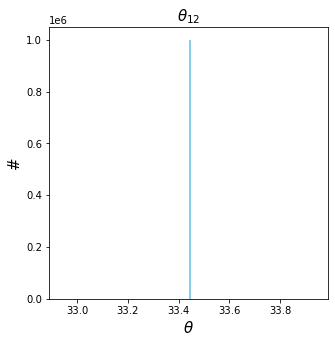

In [5]:
plt.figure(figsize = (5,5))
plt.hist(data['theta12'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{12} $', fontsize=15)

Text(0.5, 1.0, '$\\theta_{13} $')

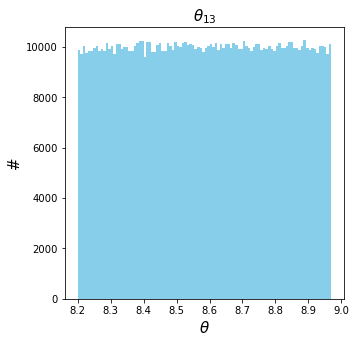

In [6]:
plt.figure(figsize = (5,5))
plt.hist(data['theta13'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{13} $', fontsize=15)

Text(0.5, 1.0, '$\\theta_{23} $')

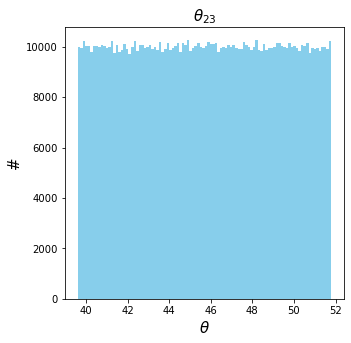

In [7]:
plt.figure(figsize = (5,5))
plt.hist(data['theta23'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{23} $', fontsize=15)

Text(0.5, 1.0, '$\\delta_{CP} $')

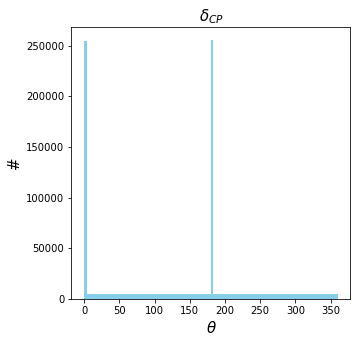

In [8]:
plt.figure(figsize = (5,5))
plt.hist(data['delta'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\delta_{CP} $', fontsize=15)

Text(0.5, 1.0, '$\\Delta m^2_{21} $')

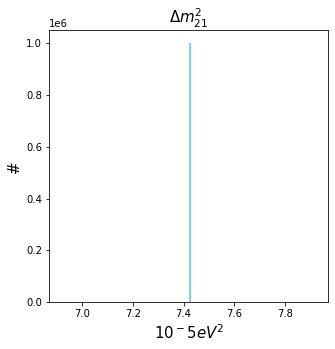

In [9]:
plt.figure(figsize = (5,5))
plt.hist(data['sdm'],bins=100,color = "skyblue")
plt.xlabel(r'$10^-5  eV^2 $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\Delta m^2_{21} $', fontsize=15)

Text(0.5, 1.0, '$\\Delta m^2_{31} $')

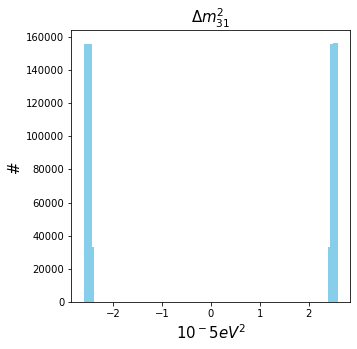

In [10]:
plt.figure(figsize = (5,5))
plt.hist(data['ldm'],bins=100,color = "skyblue")
plt.xlabel(r'$10^-5  eV^2 $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\Delta m^2_{31} $', fontsize=15)

In [12]:
# Splitting 
n = 1000000

MO = tf.keras.utils.to_categorical(np.where(data['mo']==-1,0,1))

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]

ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

###分成train / validation / test
ve_dune_train = ve_dune[:int(0.8*n)] 
ve_dune_test = ve_dune[int(0.8*n):int(0.9*n)] 
ve_dune_valid = ve_dune[int(0.9*n):int(n)] 

vu_dune_train = vu_dune[:int(0.8*n)] 
vu_dune_test = vu_dune[int(0.8*n):int(0.9*n)] 
vu_dune_valid = vu_dune[int(0.9*n):int(n)] 

vebar_dune_train = vebar_dune[:int(0.8*n)] 
vebar_dune_test = vebar_dune[int(0.8*n):int(0.9*n)] 
vebar_dune_valid = vebar_dune[int(0.9*n):int(n)] 

vubar_dune_train = vubar_dune[:int(0.8*n)] 
vubar_dune_test = vubar_dune[int(0.8*n):int(0.9*n)] 
vubar_dune_valid = vubar_dune[int(0.9*n):int(n)] 

ve_t2hk_train = ve_t2hk[:int(0.8*n)] 
ve_t2hk_test = ve_t2hk[int(0.8*n):int(0.9*n)] 
ve_t2hk_valid = ve_t2hk[int(0.9*n):int(n)] 

vu_t2hk_train = vu_t2hk[:int(0.8*n)] 
vu_t2hk_test = vu_t2hk[int(0.8*n):int(0.9*n)] 
vu_t2hk_valid = vu_t2hk[int(0.9*n):int(n)] 

vebar_t2hk_train = vebar_t2hk[:int(0.8*n)] 
vebar_t2hk_test = vebar_t2hk[int(0.8*n):int(0.9*n)] 
vebar_t2hk_valid = vebar_t2hk[int(0.9*n):int(n)] 

vubar_t2hk_train = vubar_t2hk[:int(0.8*n)] 
vubar_t2hk_test = vubar_t2hk[int(0.8*n):int(0.9*n)] 
vubar_t2hk_valid = vubar_t2hk[int(0.9*n):int(n)] 

MO_train = MO[:int(0.8*n)] 
MO_test = MO[int(0.8*n):int(0.9*n)] 
MO_valid = MO[int(0.9*n):int(n)] 

In [13]:
MO

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Bulid up models

### T2HK

In [14]:
input_ve_t2hk=keras.Input(shape=(11,),name="input_ve_t2hk")
input_vebar_t2hk=keras.Input(shape=(11,),name="input_vebar_t2hk")

input_vu_t2hk=keras.Input(shape=(11,),name="input_vu_t2hk")
input_vubar_t2hk=keras.Input(shape=(11,),name="input_vubar_t2hk")

dense3 =layers.Dense(32,name="dense3", activation='relu')(input_ve_t2hk)
dense4 =layers.Dense(32,name="dense4", activation='relu')(input_vebar_t2hk)

dense8 =layers.Dense(32,name="dense8", activation='relu')(input_vu_t2hk)
dense9 =layers.Dense(32,name="dense9", activation='relu')(input_vubar_t2hk)

concat=layers.Concatenate(name="Concatenate")([dense3,dense4, dense8,dense9])

dense5 =layers.Dense(64,name="dense5", activation='relu')(concat)

output_label =layers.Dense(2, activation='softmax',name="output_label")(dense5)

model_T2=keras.Model(inputs=[input_ve_t2hk,input_vebar_t2hk
                             ,input_vu_t2hk,input_vubar_t2hk], outputs=[output_label],name="model_T2")
model_T2.compile(loss='binary_crossentropy',
           optimizer="adam",
            metrics=('accuracy'))
model_T2.summary()

Model: "model_T2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ve_t2hk (InputLayer)      [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vebar_t2hk (InputLayer)   [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vu_t2hk (InputLayer)      [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vubar_t2hk (InputLayer)   [(None, 11)]         0                                            
___________________________________________________________________________________________

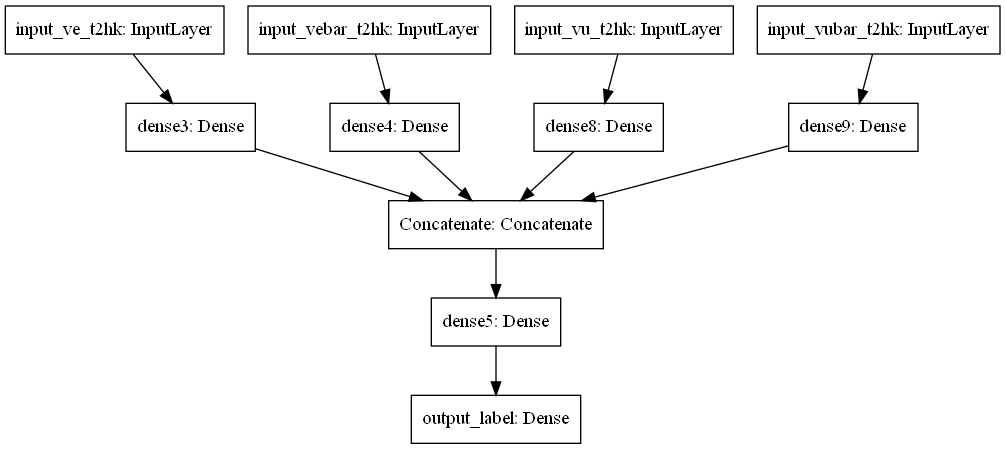

In [15]:
keras.utils.plot_model(model_T2, "model_T2.png")

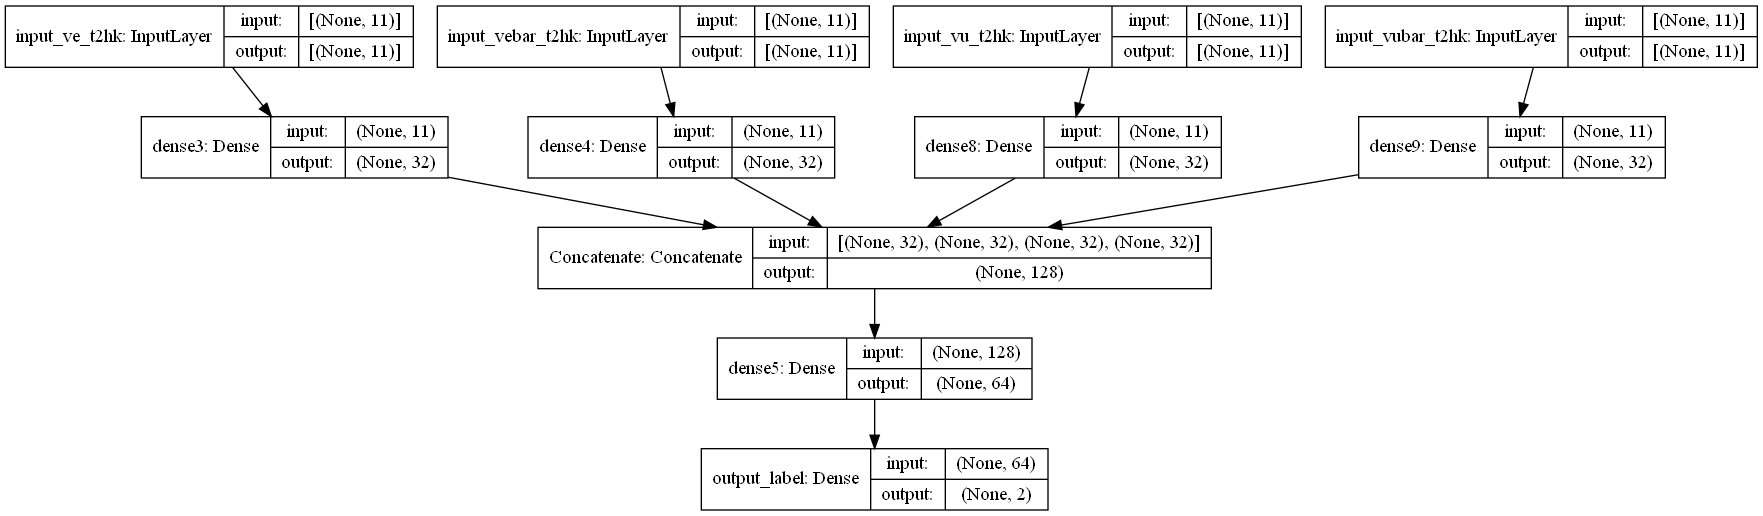

In [16]:
keras.utils.plot_model(model_T2, "model_T2_with_shape_info.png", show_shapes=True)

# Define Generators

In [18]:
batch_size = 512
nb_train_samples = len(MO_train)
nb_valid_samples = len(MO_valid)
nb_test_samples = len(MO_test)

### T2HK

In [19]:
def train_generator_T2():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
            
            y_batch = []               
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_train[i]/np.max(ve_t2hk_train[i]))
                x4_batch.append(vebar_t2hk_train[i]/np.max(vebar_t2hk_train[i]))
                
                x7_batch.append(vu_t2hk_train[i]/np.max(vu_t2hk_train[i]))
                x8_batch.append(vubar_t2hk_train[i]/np.max(vubar_t2hk_train[i]))
                
                y_batch.append(MO_train[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
train_generator_T2 = train_generator_T2()

In [20]:
def valid_generator_T2():
    while True:
        for start in range(0, nb_valid_samples, batch_size):
            x3_batch = []
            x4_batch = []
            
            x7_batch = []
            x8_batch = []
            
            y_batch = []    
            
            end = min(start + batch_size, nb_valid_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_valid[i]/np.max(ve_t2hk_valid[i]))
                x4_batch.append(vebar_t2hk_valid[i]/np.max(vebar_t2hk_valid[i]))
               
                x7_batch.append(vu_t2hk_valid[i]/np.max(vu_t2hk_valid[i]))
                x8_batch.append(vubar_t2hk_valid[i]/np.max(vubar_t2hk_valid[i]))   
                
                y_batch.append(MO_valid[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
valid_generator_T2 = valid_generator_T2()

In [21]:
def test_generator_T2():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + batch_size, nb_test_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_test[i]/np.max(ve_t2hk_test[i]))
                x4_batch.append(vebar_t2hk_test[i]/np.max(vebar_t2hk_test[i]))
                
                x7_batch.append(vu_t2hk_test[i]/np.max(vu_t2hk_test[i]))
                x8_batch.append(vubar_t2hk_test[i]/np.max(vubar_t2hk_test[i]))
                
                y_batch.append(MO_test[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
test_generator_T2 = test_generator_T2()

In [22]:
next(test_generator_T2)

({'input_ve_t2hk': array([[1.        , 0.6285941 , 0.42131037, ..., 0.32906424, 0.23072664,
          0.23504513],
         [1.        , 0.62804892, 0.42074127, ..., 0.29682785, 0.20915557,
          0.21596204],
         [1.        , 0.62621434, 0.41885653, ..., 0.38845516, 0.25764907,
          0.2484626 ],
         ...,
         [1.        , 0.62798869, 0.42067184, ..., 0.34651632, 0.23311784,
          0.22947216],
         [1.        , 0.62507863, 0.41768706, ..., 0.25419346, 0.17636298,
          0.18295381],
         [1.        , 0.62706267, 0.4197201 , ..., 0.27690808, 0.1931309 ,
          0.19918972]]),
  'input_vebar_t2hk': array([[1.        , 0.04846287, 0.11702768, ..., 0.15293525, 0.07275595,
          0.51486361],
         [1.        , 0.04843347, 0.11981214, ..., 0.15220522, 0.07164187,
          0.49785294],
         [1.        , 0.04834747, 0.097057  , ..., 0.11948317, 0.06194583,
          0.46545979],
         ...,
         [1.        , 0.04842418, 0.10012393, ..., 

# Model Training

### T2HK

In [24]:
History_T2 = model_T2.fit(
    train_generator_T2,
    epochs= 15,
    steps_per_epoch= nb_train_samples // batch_size,
    validation_data= valid_generator_T2,
    validation_steps = nb_valid_samples//batch_size,
    shuffle = True
)

Epoch 1/15
1562/1562 [==============================] - 33s 20ms/step - loss: 0.3013 - accuracy: 0.8645 - val_loss: 0.2487 - val_accuracy: 0.8805
Epoch 2/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2427 - accuracy: 0.8847 - val_loss: 0.2380 - val_accuracy: 0.8862
Epoch 3/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2344 - accuracy: 0.8897 - val_loss: 0.2300 - val_accuracy: 0.8911
Epoch 4/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2238 - accuracy: 0.8961 - val_loss: 0.2169 - val_accuracy: 0.8983
Epoch 5/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2040 - accuracy: 0.9076 - val_loss: 0.1881 - val_accuracy: 0.9161
Epoch 6/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.1695 - accuracy: 0.9293 - val_loss: 0.1467 - val_accuracy: 0.9423
Epoch 7/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.1240 - accuracy: 0.9581 - val_loss: 0.0988 -

In [25]:
# Evaluating the model
scores_test_T2 = model_T2.evaluate_generator(generator=test_generator_T2, steps=nb_test_samples // batch_size)
print("Test accuracy is {}".format(scores_test_T2[1]))

scores_train_T2 = model_T2.evaluate_generator(generator=train_generator_T2, steps=nb_train_samples // batch_size)
print("Train accuracy is {}".format(scores_train_T2[1]))

C:\Users\Cheng-Li\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy is 0.999929666519165
Train accuracy is 0.9999287128448486


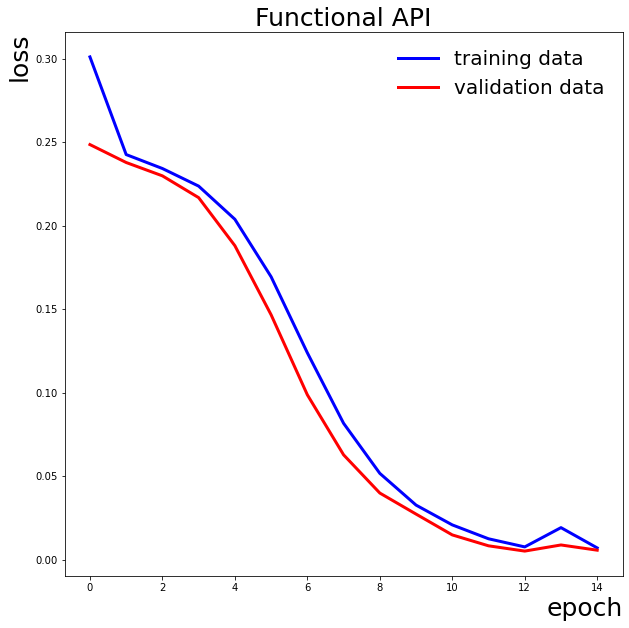

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(History_T2.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_T2.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("Functional API", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

plt.show()

# Score Predict

### Load Input Data

In [27]:
data2 = np.load('sample_4-1.npz')
data2.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo',
 'deltacp']

### Build Input Generator

In [32]:
N_input = len(data2['deltacp'])

In [33]:
def input_generator_DUT2():
    while True:
        for start in range(0, N_input, N_input):
            x1_batch = []
            x2_batch = []
            x3_batch = []
            x4_batch = []
            
            x5_batch = []
            x6_batch = []
            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
                x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))
                x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
                x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))
                
                x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
                x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))
                x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
                x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i]))
                
                y_batch.append(data2['mo'][i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_DUT2 = input_generator_DUT2()

In [34]:
def input_generator_DU():
    while True:
        for start in range(0, N_input, N_input):
            x1_batch = []
            x2_batch = []
            
            x5_batch = []
            x6_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
                x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))
                
                x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
                x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))
                
                y_batch.append(data2['mo'][i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_DU = input_generator_DU()

In [35]:
def input_generator_T2():
    while True:
        for start in range(0, N_input, N_input):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
                x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))

                x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
                x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i]))
                
                y_batch.append(data2['mo'][i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_T2 = input_generator_T2()

### Prediction

In [36]:
prediction_T2 = model_T2.predict(input_generator_T2, verbose=1,steps = 1)

1/1 [==============================] - 0s 81ms/step


# Calculate Chi Square

In [37]:
P_cpc_T2 = np.transpose(prediction_T2)[0]
P_cpv_T2 = np.transpose(prediction_T2)[1]

In [38]:
delta_chi2_T2 = 2*np.log(1/P_cpc_T2)

# Plot ML Results

Text(0.5, 1.0, 'MO Sensitivity of T2HK by ML')

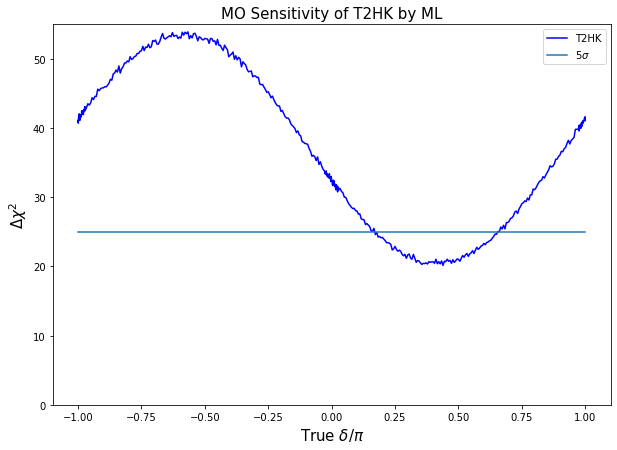

In [41]:
plt.figure(figsize = (10,7))
plt.ylim(0, 55)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_T2,'b', label='T2HK')
plt.plot(np.linspace(-1,1,100),np.full(100,25), label=r'$5 \sigma $')
plt.legend()
plt.title('MO Sensitivity of T2HK by ML', fontsize=15)

# Comparing to Tradition Method

## Load Data

In [53]:
delta_cp = []
NO_DU = []
NO_T2 = []
NO_DUT2 = []
IO_DU = []
IO_T2 = []
IO_DUT2 = []

In [54]:
#Import txt檔
f = open("MO_Sensitivity_GLOBES.txt")
#總資料組數
N = 121

In [55]:
for i in range(N):
    s = f.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    delta_cp.append(array[0])
    NO_DU.append(array[1]) 
    NO_T2.append(array[2])
    NO_DUT2.append(array[3])
    IO_DU.append(array[4]) 
    IO_T2.append(array[5]) 
    IO_DUT2.append(array[6]) 

In [56]:
delta_cp = np.array(delta_cp)
NO_DU = np.array(NO_DU)
NO_T2 = np.array(NO_T2)
NO_DUT2 = np.array(NO_DUT2)
IO_DU = np.array(IO_DU)
IO_T2 = np.array(IO_T2)
IO_DUT2 = np.array(IO_DUT2)

## Plot

### T2HK

Text(0.5, 1.0, 'MO Sensitivity of T2HK Comparision')

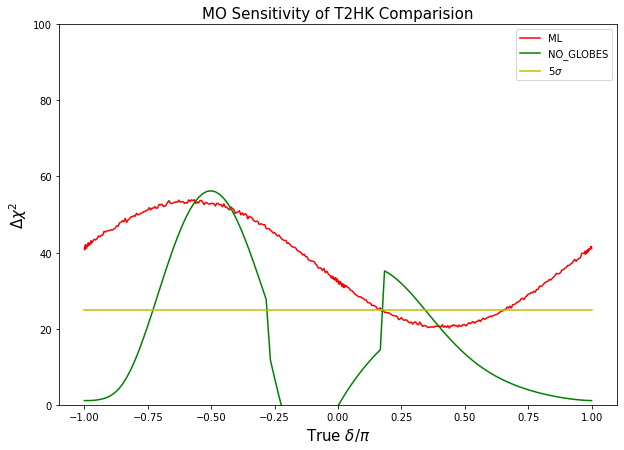

In [62]:
plt.figure(figsize = (10,7))
plt.ylim(0,100)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.plot(delta_cp/180, NO_T2,'g', label='NO_GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('MO Sensitivity of T2HK Comparision', fontsize=15)